# How Transformers solve tasks

In Transformers, what can they do?, you learned about natural language processing (NLP), speech and audio, computer vision tasks, and some important applications of them. This page will look closely at how models solve these tasks and explain what’s happening under the hood. There are many ways to solve a given task, some models may implement certain techniques or even approach the task from a new angle, but for Transformer models, the general idea is the same. Owing to its flexible architecture, most models are a variant of an encoder, a decoder, or an encoder-decoder structure.

Before diving into specific architectural variants, it’s helpful to understand that most tasks follow a similar pattern: input data is processed through a model, and the output is interpreted for a specific task. The differences lie in how the data is prepared, what model architecture variant is used, and how the output is processed.

To explain how tasks are solved, we’ll walk through what goes on inside the model to output useful predictions. We’ll cover the following models and their corresponding tasks:

    Wav2Vec2 for audio classification and automatic speech recognition (ASR)
    
    Vision Transformer (ViT) and ConvNeXT for image classification
    
    DETR for object detection
    
    Mask2Former for image segmentation
    
    GLPN for depth estimation
    
    BERT for NLP tasks like text classification, token classification and question answering that use an encoder
    
    GPT2 for NLP tasks like text generation that use a decoder
    
    BART for NLP tasks like summarization and translation that use an encoder-decoder

Before you go further, it is good to have some basic knowledge of the original Transformer architecture. Knowing how encoders, decoders, and attention work will aid you in understanding how different Transformer models work. Be sure to check out our the previous section for more information!

## Transformer models for language
Language models are at the heart of modern NLP. They’re designed to understand and generate human language by learning the statistical patterns and relationships between words or tokens in text.

The Transformer was initially designed for machine translation, and since then, it has become the default architecture for solving all AI tasks. Some tasks lend themselves to the Transformer’s encoder structure, while others are better suited for the decoder. Still, other tasks make use of both the Transformer’s encoder-decoder structure.

### How language models work
Language models work by being trained to predict the probability of a word given the context of surrounding words. This gives them a foundational understanding of language that can generalize to other tasks.

There are two main approaches for training a transformer model:

    Masked language modeling (MLM): Used by encoder models like BERT, this approach randomly masks some tokens in the input and trains the model to predict the original tokens based on the surrounding context. This allows the model to learn bidirectional context (looking at words both before and after the masked word).
    
    Causal language modeling (CLM): Used by decoder models like GPT, this approach predicts the next token based on all previous tokens in the sequence. The model can only use context from the left (previous tokens) to predict the next token.

### Types of language models
In the Transformers library, language models generally fall into three architectural categories:

    Encoder-only models (like BERT): These models use a bidirectional approach to understand context from both directions. They’re best suited for tasks that require deep understanding of text, such as classification, named entity recognition, and question answering.
    
    Decoder-only models (like GPT, Llama): These models process text from left to right and are particularly good at text generation tasks. They can complete sentences, write essays, or even generate code based on a prompt.
    
    Encoder-decoder models (like T5, BART): These models combine both approaches, using an encoder to understand the input and a decoder to generate output. They excel at sequence-to-sequence tasks like translation, summarization, and question answering.

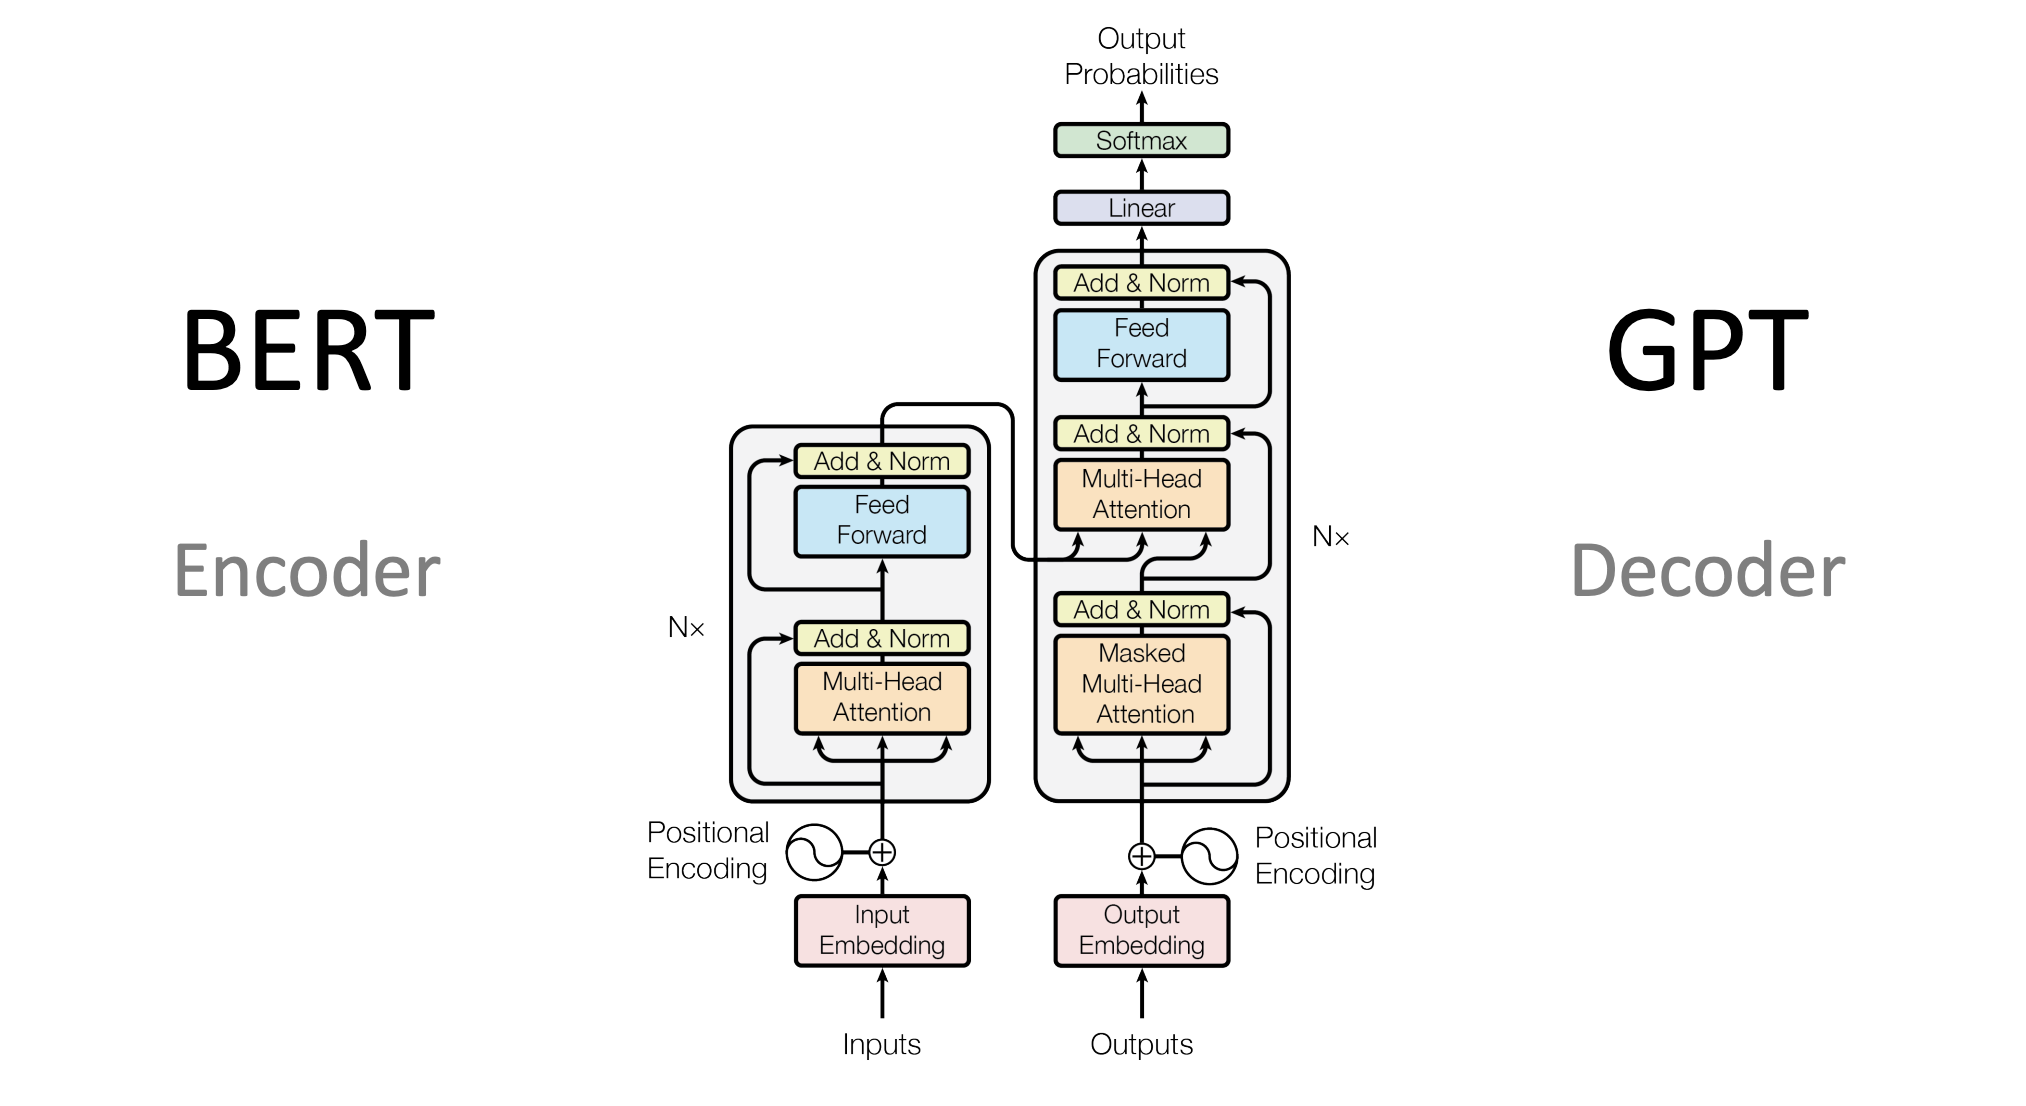

As we covered in the previous section, language models are typically pretrained on large amounts of text data in a self-supervised manner (without human annotations), then fine-tuned on specific tasks. This approach, known as transfer learning, allows these models to adapt to many different NLP tasks with relatively small amounts of task-specific data.

In the following sections, we’ll explore specific model architectures and how they’re applied to various tasks across speech, vision, and text domains.

Understanding which part of the Transformer architecture (encoder, decoder, or both) is best suited for a particular NLP task is key to choosing the right model. Generally, tasks requiring bidirectional context use encoders, tasks generating text use decoders, and tasks converting one sequence to another use encoder-decoders.

### Text generation
Text generation involves creating coherent and contextually relevant text based on a prompt or input.

GPT-2 is a decoder-only model pretrained on a large amount of text. It can generate convincing (though not always true!) text given a prompt and complete other NLP tasks like question answering despite not being explicitly trained to.

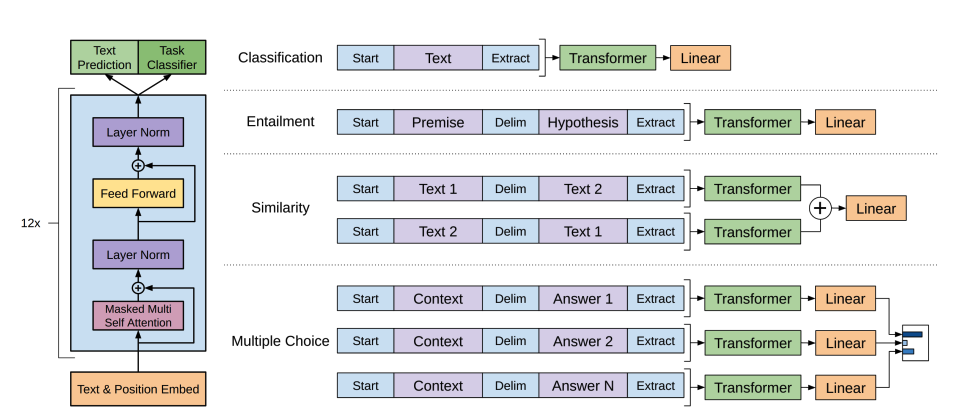

    GPT-2 uses byte pair encoding (BPE) to tokenize words and generate a token embedding. Positional encodings are added to the token embeddings to indicate the position of each token in the sequence. The input embeddings are passed through multiple decoder blocks to output some final hidden state. Within each decoder block, GPT-2 uses a masked self-attention layer which means GPT-2 can’t attend to future tokens. It is only allowed to attend to tokens on the left. This is different from BERT’s [mask] token because, in masked self-attention, an attention mask is used to set the score to 0 for future tokens.
    
    The output from the decoder is passed to a language modeling head, which performs a linear transformation to convert the hidden states into logits. The label is the next token in the sequence, which are created by shifting the logits to the right by one. The cross-entropy loss is calculated between the shifted logits and the labels to output the next most likely token.

GPT-2’s pretraining objective is based entirely on causal language modeling, predicting the next word in a sequence. This makes GPT-2 especially good at tasks that involve generating text.

Ready to try your hand at text generation? Check out our complete causal language modeling guide to learn how to finetune DistilGPT-2 and use it for inference!

### Text classification
Text classification involves assigning predefined categories to text documents, such as sentiment analysis, topic classification, or spam detection.

BERT is an encoder-only model and is the first model to effectively implement deep bidirectionality to learn richer representations of the text by attending to words on both sides.

1) BERT uses WordPiece tokenization to generate a token embedding of the text. To tell the difference between a single sentence and a pair of sentences, a special [SEP] token is added to differentiate them. A special [CLS] token is added to the beginning of every sequence of text. The final output with the [CLS] token is used as the input to the classification head for classification tasks. BERT also adds a segment embedding to denote whether a token belongs to the first or second sentence in a pair of sentences.

2) BERT is pretrained with two objectives: masked language modeling and next-sentence prediction. In masked language modeling, some percentage of the input tokens are randomly masked, and the model needs to predict these. This solves the issue of bidirectionality, where the model could cheat and see all the words and “predict” the next word. The final hidden states of the predicted mask tokens are passed to a feedforward network with a softmax over the vocabulary to predict the masked word.

The second pretraining object is next-sentence prediction. The model must predict whether sentence B follows sentence A. Half of the time sentence B is the next sentence, and the other half of the time, sentence B is a random sentence. The prediction, whether it is the next sentence or not, is passed to a feedforward network with a softmax over the two classes (IsNext and NotNext).

The input embeddings are passed through multiple encoder layers to output some final hidden states.

To use the pretrained model for text classification, add a sequence classification head on top of the base BERT model. The sequence classification head is a linear layer that accepts the final hidden states and performs a linear transformation to convert them into logits. The cross-entropy loss is calculated between the logits and target to find the most likely label.

Ready to try your hand at text classification? Check out our complete text classification guide to learn how to finetune DistilBERT and use it for inference!

### Token classification
Token classification involves assigning a label to each token in a sequence, such as in named entity recognition or part-of-speech tagging.

To use BERT for token classification tasks like named entity recognition (NER), add a token classification head on top of the base BERT model. The token classification head is a linear layer that accepts the final hidden states and performs a linear transformation to convert them into logits. The cross-entropy loss is calculated between the logits and each token to find the most likely label.

Ready to try your hand at token classification? Check out our complete token classification guide to learn how to finetune DistilBERT and use it for inference!

### Question answering
Question answering involves finding the answer to a question within a given context or passage.

To use BERT for question answering, add a span classification head on top of the base BERT model. This linear layer accepts the final hidden states and performs a linear transformation to compute the span start and end logits corresponding to the answer. The cross-entropy loss is calculated between the logits and the label position to find the most likely span of text corresponding to the answer.

Ready to try your hand at question answering? Check out our complete question answering guide to learn how to finetune DistilBERT and use it for inference!

💡 Notice how easy it is to use BERT for different tasks once it’s been pretrained. You only need to add a specific head to the pretrained model to manipulate the hidden states into your desired output!

### Summarization
Summarization involves condensing a longer text into a shorter version while preserving its key information and meaning.

Encoder-decoder models like BART and T5 are designed for the sequence-to-sequence pattern of a summarization task. We’ll explain how BART works in this section, and then you can try finetuning T5 at the end.

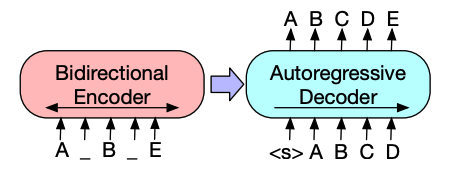

1) BART’s encoder architecture is very similar to BERT and accepts a token and positional embedding of the text. BART is pretrained by corrupting the input and then reconstructing it with the decoder. Unlike other encoders with specific corruption strategies, BART can apply any type of corruption. The text infilling corruption strategy works the best though. In text infilling, a number of text spans are replaced with a single [mask] token. This is important because the model has to predict the masked tokens, and it teaches the model to predict the number of missing tokens. The input embeddings and masked spans are passed through the encoder to output some final hidden states, but unlike BERT, BART doesn’t add a final feedforward network at the end to predict a word.

2) The encoder’s output is passed to the decoder, which must predict the masked tokens and any uncorrupted tokens from the encoder’s output. This gives additional context to help the decoder restore the original text. The output from the decoder is passed to a language modeling head, which performs a linear transformation to convert the hidden states into logits. The cross-entropy loss is calculated between the logits and the label, which is just the token shifted to the right.

Ready to try your hand at summarization? Check out our complete summarization guide to learn how to finetune T5 and use it for inference!

### Translation
Translation involves converting text from one language to another while preserving its meaning. Translation is another example of a sequence-to-sequence task, which means you can use an encoder-decoder model like BART or T5 to do it. We’ll explain how BART works in this section, and then you can try finetuning T5 at the end.

BART adapts to translation by adding a separate randomly initialized encoder to map a source language to an input that can be decoded into the target language. This new encoder’s embeddings are passed to the pretrained encoder instead of the original word embeddings. The source encoder is trained by updating the source encoder, positional embeddings, and input embeddings with the cross-entropy loss from the model output. The model parameters are frozen in this first step, and all the model parameters are trained together in the second step. BART has since been followed up by a multilingual version, mBART, intended for translation and pretrained on many different languages.

Ready to try your hand at translation? Check out our complete translation guide to learn how to finetune T5 and use it for inference!

As you’ve seen throughout this guide, many models follow similar patterns despite addressing different tasks. Understanding these common patterns can help you quickly grasp how new models work and how to adapt existing models to your specific needs.

## Modalities beyond text
Transformers are not limited to text. They can also be applied to other modalities like speech and audio, images, and video. Of course, on this course we will focus on text, but we can briefly introduce the other modalities.

### Speech and audio
Let’s start by exploring how Transformer models handle speech and audio data, which presents unique challenges compared to text or images.

Whisper is a encoder-decoder (sequence-to-sequence) transformer pretrained on 680,000 hours of labeled audio data. This amount of pretraining data enables zero-shot performance on audio tasks in English and many other languages. The decoder allows Whisper to map the encoders learned speech representations to useful outputs, such as text, without additional fine-tuning. Whisper just works out of the box.

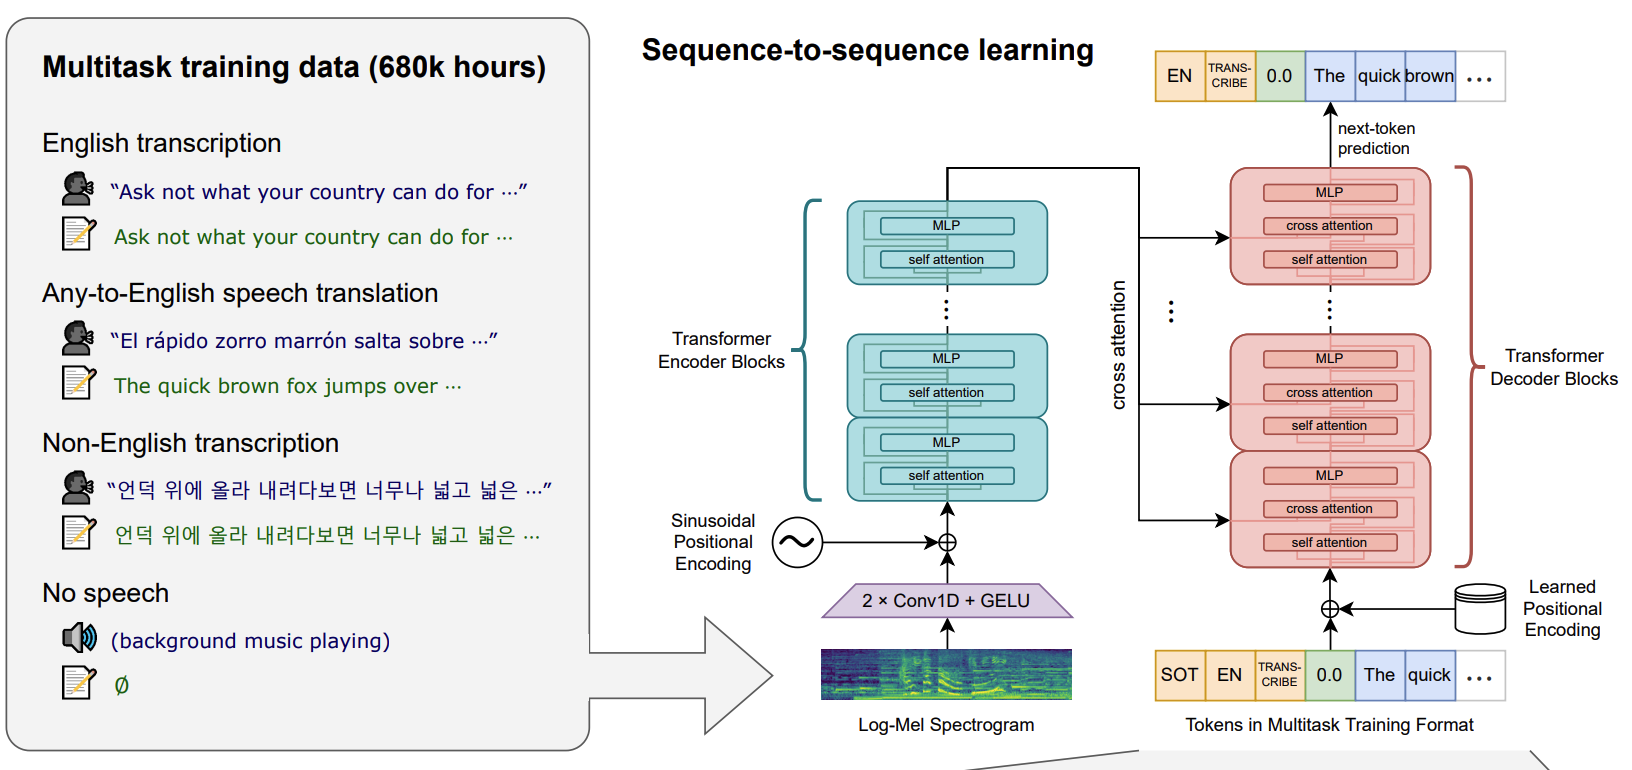

Diagram is from Whisper paper.

This model has two main components:

    An encoder processes the input audio. The raw audio is first converted into a log-Mel spectrogram. This spectrogram is then passed through a Transformer encoder network.
    
    A decoder takes the encoded audio representation and autoregressively predicts the corresponding text tokens. It’s a standard Transformer decoder trained to predict the next text token given the previous tokens and the encoder output. Special tokens are used at the beginning of the decoder input to steer the model towards specific tasks like transcription, translation, or language identification.

Whisper was pretrained on a massive and diverse dataset of 680,000 hours of labeled audio data collected from the web. This large-scale, weakly supervised pretraining is the key to its strong zero-shot performance across many languages and tasks.

Now that Whisper is pretrained, you can use it directly for zero-shot inference or finetune it on your data for improved performance on specific tasks like automatic speech recognition or speech translation!

The key innovation in Whisper is its training on an unprecedented scale of diverse, weakly supervised audio data from the internet. This allows it to generalize remarkably well to different languages, accents, and tasks without task-specific finetuning.

### Automatic speech recognition
To use the pretrained model for automatic speech recognition, you leverage its full encoder-decoder structure. The encoder processes the audio input, and the decoder autoregressively generates the transcript token by token. When fine-tuning, the model is typically trained using a standard sequence-to-sequence loss (like cross-entropy) to predict the correct text tokens based on the audio input.

The easiest way to use a fine-tuned model for inference is within a pipeline.

In [1]:
from transformers import pipeline

transcriber = pipeline(
    task="automatic-speech-recognition", model="openai/whisper-base.en"
)
transcriber("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")
# Output: {'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}

/opt/anaconda3/envs/torch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use mps:0
`return_token_timestamps` is deprecated for WhisperFeatureExtractor and will be removed in Transformers v5. Use `return_attention_mask` instead, as the number of frames can be inferred from it.
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.


{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}

Ready to try your hand at automatic speech recognition? Check out our complete automatic speech recognition guide to learn how to finetune Whisper and use it for inference!

### Computer vision
Now let’s move on to computer vision tasks, which deal with understanding and interpreting visual information from images or videos.

There are two ways to approach computer vision tasks:

    Split an image into a sequence of patches and process them in parallel with a Transformer.
    
    Use a modern CNN, like ConvNeXT, which relies on convolutional layers but adopts modern network designs.

A third approach mixes Transformers with convolutions (for example, Convolutional Vision Transformer or LeViT). We won’t discuss those because they just combine the two approaches we examine here.

ViT and ConvNeXT are commonly used for image classification, but for other vision tasks like object detection, segmentation, and depth estimation, we’ll look at DETR, Mask2Former and GLPN, respectively; these models are better suited for those tasks.

### Image classification
Image classification is one of the fundamental computer vision tasks. Let’s see how different model architectures approach this problem.

ViT and ConvNeXT can both be used for image classification; the main difference is that ViT uses an attention mechanism while ConvNeXT uses convolutions.

ViT replaces convolutions entirely with a pure Transformer architecture. If you’re familiar with the original Transformer, then you’re already most of the way toward understanding ViT.

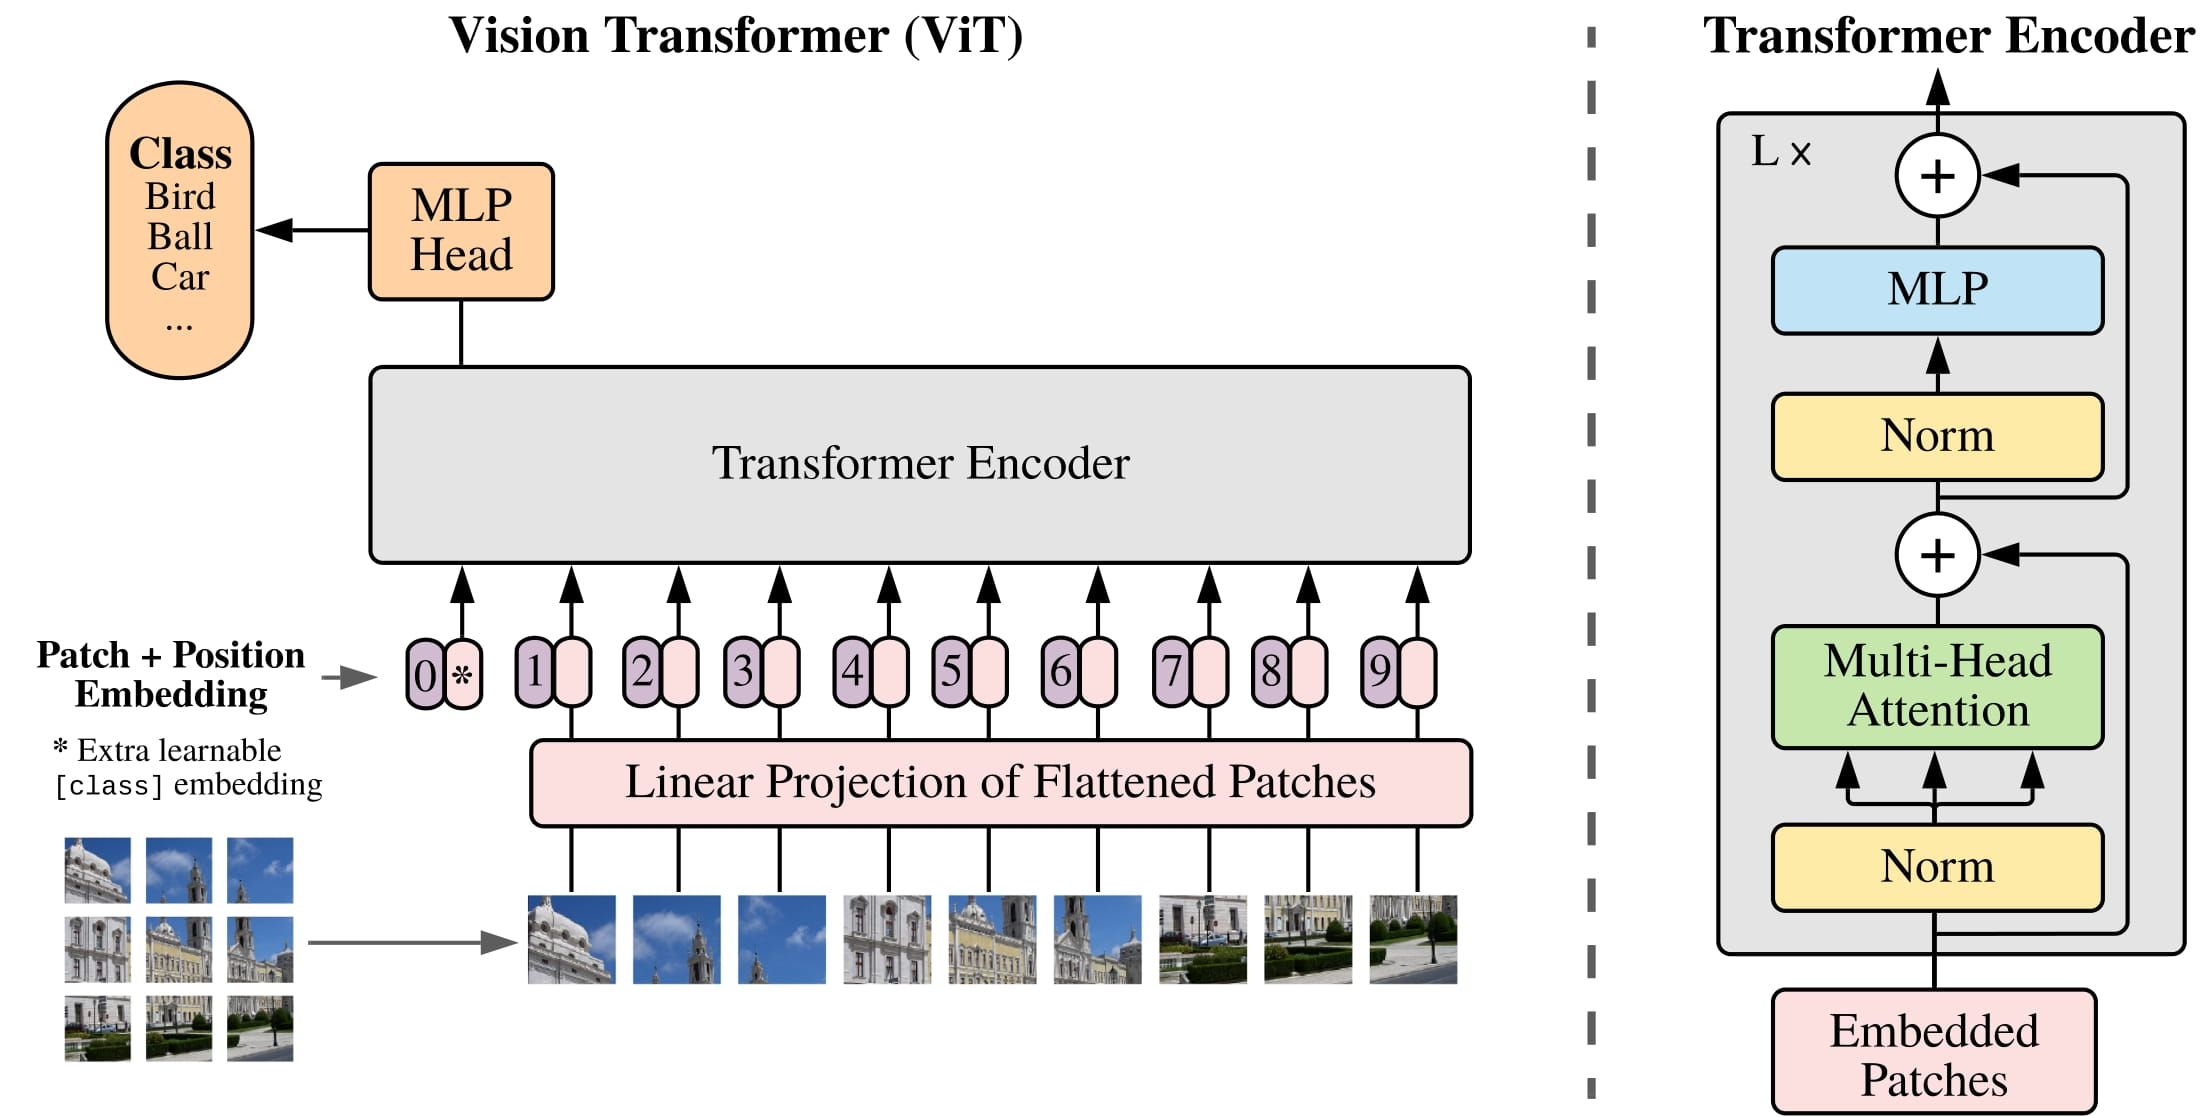

The main change ViT introduced was in how images are fed to a Transformer:

1) An image is split into square non-overlapping patches, each of which gets turned into a vector or patch embedding. The patch embeddings are generated from a convolutional 2D layer which creates the proper input dimensions (which for a base Transformer is 768 values for each patch embedding). If you had a 224x224 pixel image, you could split it into 196 16x16 image patches. Just like how text is tokenized into words, an image is “tokenized” into a sequence of patches.

2) A learnable embedding - a special [CLS] token - is added to the beginning of the patch embeddings just like BERT. The final hidden state of the [CLS] token is used as the input to the attached classification head; other outputs are ignored. This token helps the model learn how to encode a representation of the image.

3) The last thing to add to the patch and learnable embeddings are the position embeddings because the model doesn’t know how the image patches are ordered. The position embeddings are also learnable and have the same size as the patch embeddings. Finally, all of the embeddings are passed to the Transformer encoder.

4) The output, specifically only the output with the [CLS] token, is passed to a multilayer perceptron head (MLP). ViT’s pretraining objective is simply classification. Like other classification heads, the MLP head converts the output into logits over the class labels and calculates the cross-entropy loss to find the most likely class.

Ready to try your hand at image classification? Check out our complete image classification guide to learn how to fine-tune ViT and use it for inference!

Notice the parallel between ViT and BERT: both use a special token ([CLS]) to capture the overall representation, both add position information to their embeddings, and both use a Transformer encoder to process the sequence of tokens/patches.